In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from AdamANN import AdamANN_clf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

# Prepare the data

In [2]:
# load MNIST
path = 'Data/MNIST/'

mnist_train = pd.read_csv(path+'mnist_train.csv', header=None)
mnist_test = pd.read_csv(path+'mnist_test.csv', header=None)

In [3]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = mnist_train.drop(0, axis=1)
y_train = mnist_train[0]

X_test = mnist_test.drop(0, axis=1)
y_test = mnist_test[0]

In [5]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Number of training samples :', len(X_train))
print('Number of cross-validation samples :', len(X_cv))
print('Number of test samples :', len(X_test))

Number of training samples : 48000
Number of cross-validation samples : 12000
Number of test samples : 10000


In [6]:
# normalize the data
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_cv = normalizer.transform(X_cv)
X_test = normalizer.transform(X_test)

# Model test

Cost function after epoch 0 : 0.24981602712745035
Cost function after epoch 20 : 0.23568218974810706
Cost function after epoch 40 : 0.22023573001664248
Cost function after epoch 60 : 0.19871628065532584
Cost function after epoch 80 : 0.1880728803060415
Cost function after epoch 100 : 0.1728628437057853
Cost function after epoch 120 : 0.1573000250094019
Cost function after epoch 140 : 0.14643267208429145
Cost function after epoch 160 : 0.14163055236738845
Cost function after epoch 180 : 0.13172676281123824
Cost function after epoch 200 : 0.12310852054173682
Time : 37.133 s
train accuracy :  0.9893125
CV accuracy :  0.962083333333
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1175
          1       0.98      0.98      0.98      1322
          2       0.95      0.95      0.95      1174
          3       0.96      0.95      0.96      1219
          4       0.95      0.98      0.97      1176
          5       0.97      0.94      0.95  

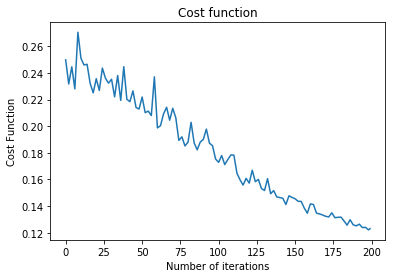

In [7]:
# set hyperparameters
hidden_units = [20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.1
epoch = 200
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size)

AdamNN.fit(X_train, y_train)

y_train_pred = AdamNN.predict(X_train)
y_cv_pred = AdamNN.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

print(classification_report(y_cv, y_cv_pred))

Cost function after epoch 0 : 0.4376479350317981
Cost function after epoch 30 : 0.23213482937557267
Cost function after epoch 60 : 0.21140318442310624
Cost function after epoch 90 : 0.1786683457404954
Cost function after epoch 120 : 0.16030547165457423
Cost function after epoch 150 : 0.13702870435645967
Cost function after epoch 180 : 0.12748987877741527
Cost function after epoch 210 : 0.11777258811556393
Cost function after epoch 240 : 0.1130507957641564
Cost function after epoch 270 : 0.1098783859830468
Cost function after epoch 300 : 0.10823122613676213
Time : 70.166 s
train accuracy :  0.997708333333
CV accuracy :  0.966666666667
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1175
          1       0.98      0.99      0.99      1322
          2       0.95      0.97      0.96      1174
          3       0.96      0.95      0.96      1219
          4       0.97      0.98      0.97      1176
          5       0.96      0.95      0

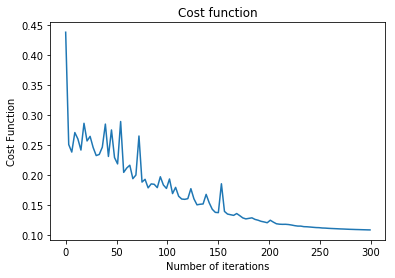

In [8]:
# set hyperparameters
hidden_units = [20,20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.1
epoch = 300
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN2 = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size)

AdamNN2.fit(X_train, y_train)

y_train_pred = AdamNN2.predict(X_train)
y_cv_pred = AdamNN2.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

print(classification_report(y_cv, y_cv_pred))

Cost function after epoch 0 : 0.4306586231242324
Cost function after epoch 30 : 0.302174743520051
Cost function after epoch 60 : 0.30382888166621613
Cost function after epoch 90 : 0.27653952974993434
Cost function after epoch 120 : 0.2638408153577986
Cost function after epoch 150 : 0.23521571488887516
Cost function after epoch 180 : 0.22235238294254267
Cost function after epoch 210 : 0.1976647287161219
Cost function after epoch 240 : 0.18708715302296502
Cost function after epoch 270 : 0.18202893025141462
Cost function after epoch 300 : 0.18213314041774442
Time : 86.639 s
train accuracy :  0.995729166667
CV accuracy :  0.96975
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1175
          1       0.98      0.99      0.99      1322
          2       0.96      0.96      0.96      1174
          3       0.97      0.96      0.97      1219
          4       0.96      0.98      0.97      1176
          5       0.97      0.96      0.96     

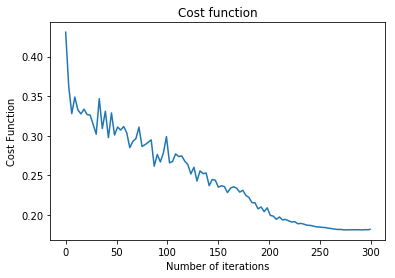

In [9]:
# set hyperparameters
hidden_units = [20,20,20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.2
epoch = 300
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size)

AdamNN.fit(X_train, y_train)

y_train_pred = AdamNN.predict(X_train)
y_cv_pred = AdamNN.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

print(classification_report(y_cv, y_cv_pred))

Cost function after epoch 0 : 0.5403524498179575
Cost function after epoch 30 : 0.4327110858383397
Cost function after epoch 60 : 0.42281824819758146
Cost function after epoch 90 : 0.38226008654168
Cost function after epoch 120 : 0.32854581976781855
Cost function after epoch 150 : 0.2927811068286087
Cost function after epoch 180 : 0.2700846299084693
Cost function after epoch 210 : 0.25205322486925624
Cost function after epoch 240 : 0.24001500110203455
Cost function after epoch 270 : 0.23565280084854948
Cost function after epoch 300 : 0.23531161496253944
Time : 104.957 s
train accuracy :  0.992770833333
CV accuracy :  0.968916666667
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1175
          1       0.98      0.99      0.98      1322
          2       0.96      0.97      0.96      1174
          3       0.97      0.95      0.96      1219
          4       0.97      0.98      0.97      1176
          5       0.97      0.95      0.9

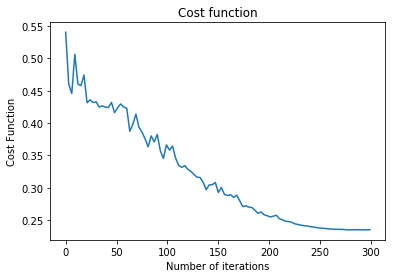

In [10]:
# set hyperparameters
hidden_units = [20,50,20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.3
epoch = 300
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size)

AdamNN.fit(X_train, y_train)

y_train_pred = AdamNN.predict(X_train)
y_cv_pred = AdamNN.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

print(classification_report(y_cv, y_cv_pred))

Cost function after epoch 0 : 0.6239577930907289
Cost function after epoch 10 : 0.44577148658534627
Cost function after epoch 20 : 0.372201543391342
Cost function after epoch 30 : 0.3423473588836999
Cost function after epoch 40 : 0.32151668378012754
Cost function after epoch 50 : 0.31181757621709877
Cost function after epoch 60 : 0.295568609973016
Cost function after epoch 70 : 0.30670080623701845
Cost function after epoch 80 : 0.2931604550349128
Cost function after epoch 90 : 0.2660934788766023
Cost function after epoch 100 : 0.271639281995539
Time : 512.654 s
train accuracy :  0.976458333333
CV accuracy :  0.966083333333
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      1175
          1       0.98      0.98      0.98      1322
          2       0.96      0.97      0.96      1174
          3       0.96      0.96      0.96      1219
          4       0.98      0.97      0.97      1176
          5       0.97      0.95      0.96      11

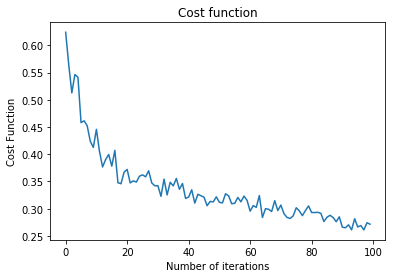

In [11]:
# set hyperparameters
hidden_units = [200,200]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.2
epoch = 100
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size)

AdamNN.fit(X_train, y_train)

y_train_pred = AdamNN.predict(X_train)
y_cv_pred = AdamNN.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

print(classification_report(y_cv, y_cv_pred))

# Using PCA

In [12]:
# trying pca to accelerate things a bit
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_train_pca = pca.fit_transform(X_train)
X_cv_pca = pca.transform(X_cv)
X_test_pca = pca.transform(X_test)

print('Number of Features after PCA (keeping 95 % of variance) :', X_train_pca.shape[1])

Number of Features after PCA (keeping 95 % of variance) : 325


Cost function after epoch 0 : 0.3006828024477829
Cost function after epoch 30 : 0.266397885692994
Cost function after epoch 60 : 0.25595145730696184
Cost function after epoch 90 : 0.23248952916587312
Cost function after epoch 120 : 0.22751923651049868
Cost function after epoch 150 : 0.2928723081675078
Cost function after epoch 180 : 0.18108868123586114
Cost function after epoch 210 : 0.17341725896403673
Cost function after epoch 240 : 0.16812436674658893
Cost function after epoch 270 : 0.1655307328414656
Cost function after epoch 300 : 0.1650400248056642
Time : 52.587 s
train accuracy :  0.989916666667
CV accuracy :  0.97025
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1175
          1       0.98      0.99      0.98      1322
          2       0.96      0.97      0.96      1174
          3       0.98      0.96      0.97      1219
          4       0.97      0.97      0.97      1176
          5       0.97      0.96      0.96      

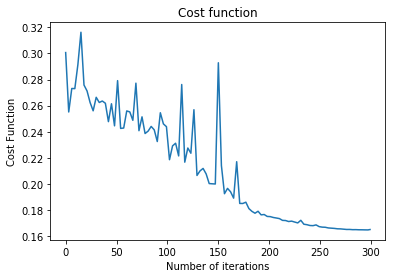

In [13]:
# set hyperparameters
hidden_units = [20,20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.2
epoch = 300
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN_pca = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size, hot_start=True)

AdamNN_pca.fit(X_train_pca, y_train)

y_train_pred = AdamNN_pca.predict(X_train_pca)
y_cv_pred = AdamNN_pca.predict(X_cv_pca)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

print(classification_report(y_cv, y_cv_pred))

Cost function after epoch 0 : 0.39035200294353833
Cost function after epoch 30 : 0.34244512574247193
Cost function after epoch 60 : 0.3253111651323479
Cost function after epoch 90 : 0.2995830668536651
Cost function after epoch 120 : 0.27434605468830403
Cost function after epoch 150 : 0.25859858113576595
Cost function after epoch 180 : 0.2437925130942688
Cost function after epoch 210 : 0.23674042749594337
Cost function after epoch 240 : 0.23075791548850913
Cost function after epoch 270 : 0.2275563365783312
Cost function after epoch 300 : 0.2262356232436456
Time : 53.036 s
train accuracy :  0.9861875
CV accuracy :  0.97025
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1175
          1       0.98      0.99      0.98      1322
          2       0.95      0.97      0.96      1174
          3       0.98      0.96      0.97      1219
          4       0.97      0.97      0.97      1176
          5       0.97      0.96      0.96      1104

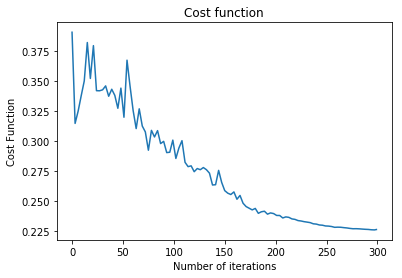

In [14]:
# set hyperparameters
hidden_units = [20,20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.3
epoch = 300
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN_pca = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size, hot_start=True)

AdamNN_pca.fit(X_train_pca, y_train)

y_train_pred = AdamNN_pca.predict(X_train_pca)
y_cv_pred = AdamNN_pca.predict(X_cv_pca)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

print(classification_report(y_cv, y_cv_pred))